In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.3
Pandas Version 1.3.4
Seaborn Version 0.11.2
Matplotlib Version 3.4.3


In [3]:
df=pd.read_excel('Sales_Data_EDA.xlsx',sheet_name='Sales')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [5]:
df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
CustID,7000000,7000001,7000002,7000003,7000004,7000005,7000006,7000007,7000008,7000009,7000010
AgentBonus,4409,2214,4273,1791,2955,3252,3850,2073,2719,3247,6676
Age,22.0,11.0,26.0,11.0,6.0,7.0,12.0,6.0,8.0,6.0,20.0
CustTenure,4.0,2.0,4.0,NaN,NaN,NaN,23.0,4.0,11.0,3.0,7.0
Channel,Agent,Third Party Partner,Agent,Third Party Partner,Agent,Third Party Partner,Agent,Agent,Agent,Online,Online
Occupation,Salaried,Salaried,Free Lancer,Salaried,Small Business,Salaried,Salaried,Small Business,Salaried,Small Business,Small Business
EducationField,Graduate,Graduate,Post Graduate,Graduate,UG,Graduate,Graduate,Under Graduate,Graduate,Under Graduate,Under Graduate
Gender,Female,Male,Male,Fe male,Male,Male,Male,Female,Male,Male,Male
ExistingProdType,3,4,4,3,3,3,4,3,4,2,4
Designation,Manager,Manager,Exe,Executive,Executive,Executive,VP,Executive,Manager,Exe,AVP


In [6]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [7]:
print('The number of rows (observations) is',df.shape[0])
print('The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4520
The number of columns (variables) is 20


In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column,': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

Channel :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


Occupation :  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64


EducationField :  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64


Gender :  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64


Designation :  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager           1620
Name: Designation, dtype: int64


MaritalStatus :  4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


Zone :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dty

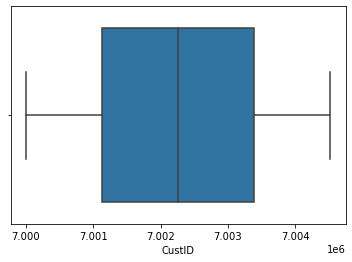

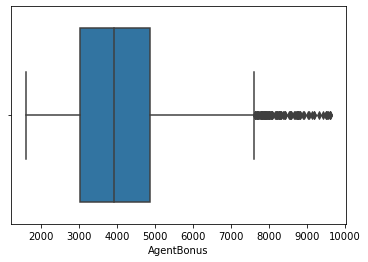

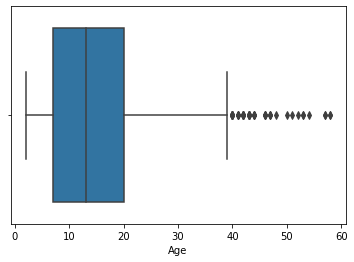

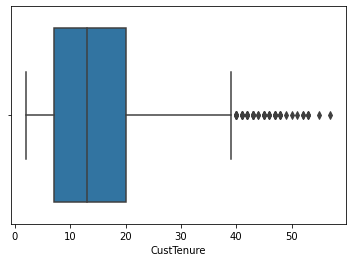

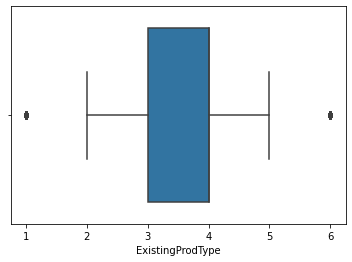

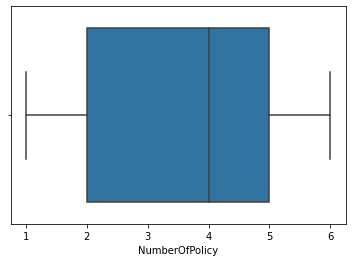

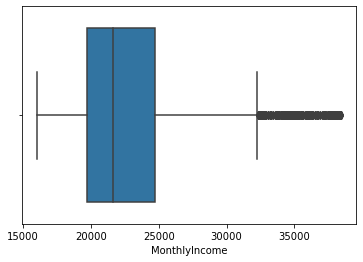

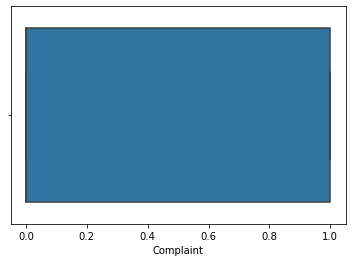

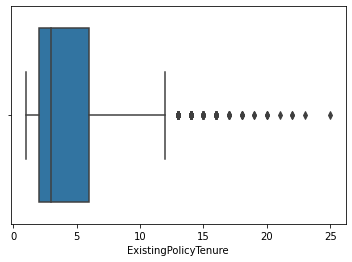

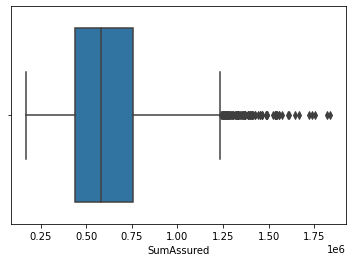

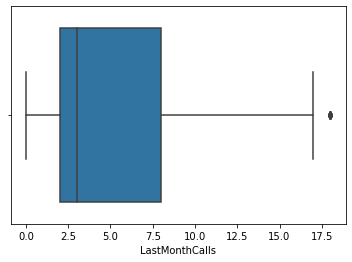

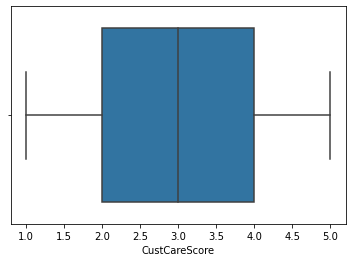

In [11]:
col_names = list(df.select_dtypes(exclude=['object']).columns)
# fig, ax = plt.subplots(len(col_names), figsize=(5,50))
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    ax[i].set_title('{}'.format(col_val), fontsize=8)
    plt.show()


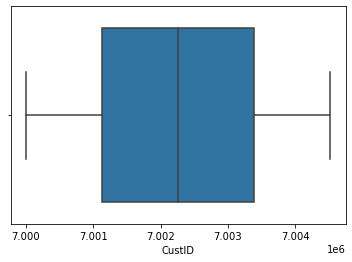

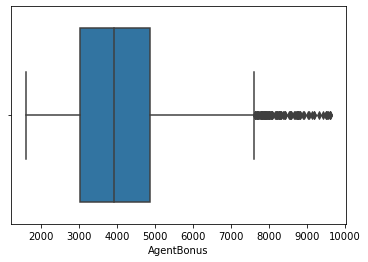

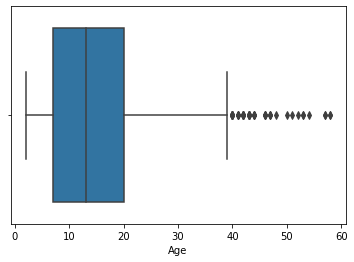

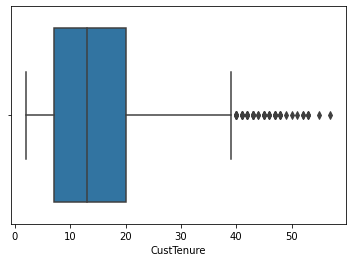

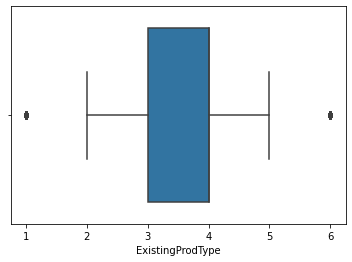

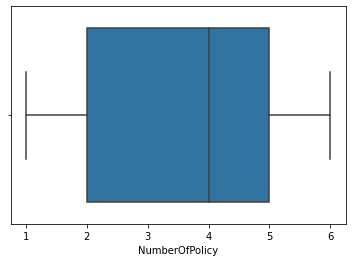

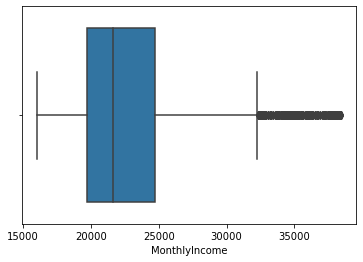

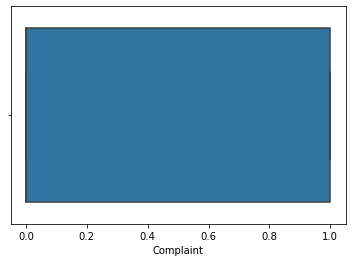

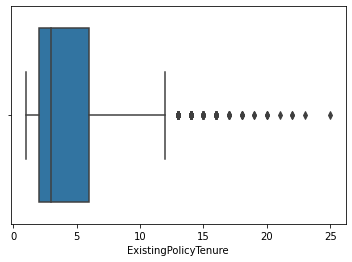

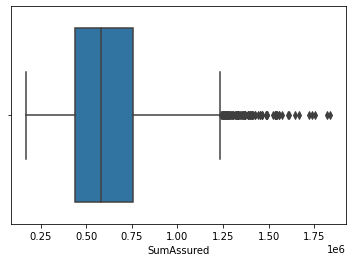

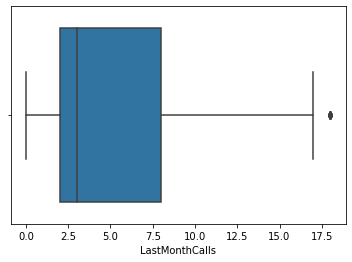

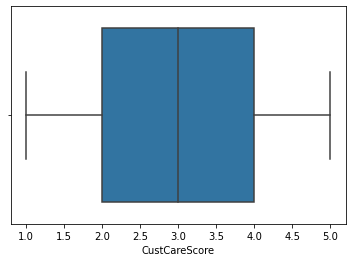

In [12]:
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    ax[i].set_title('{}'.format(col_val), fontsize=8)
    plt.show()

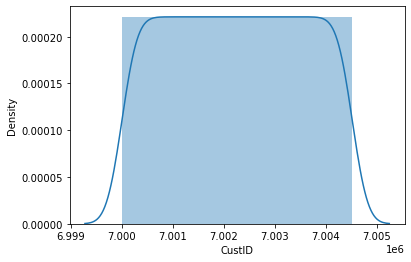

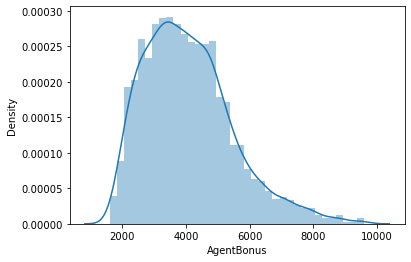

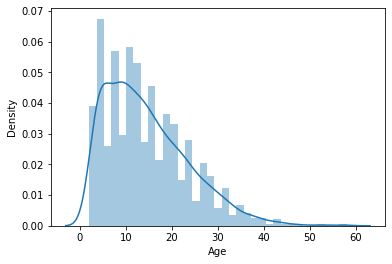

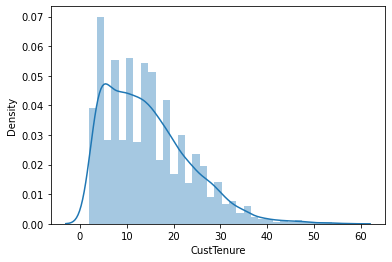

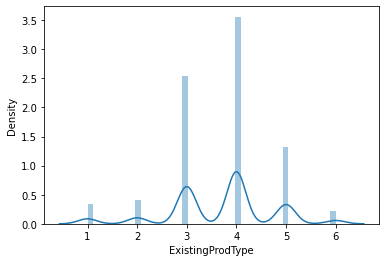

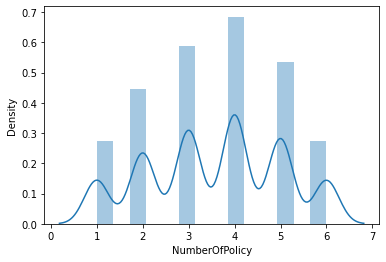

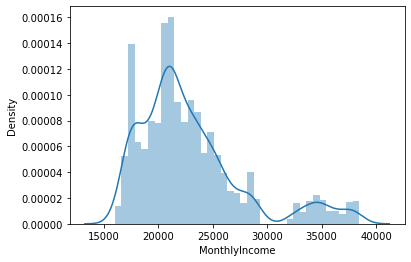

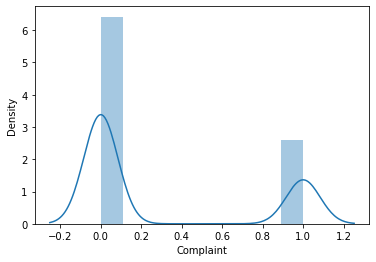

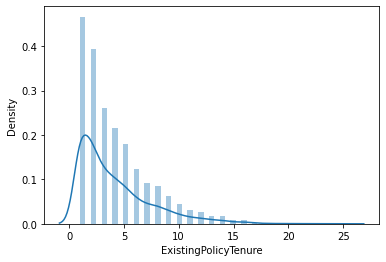

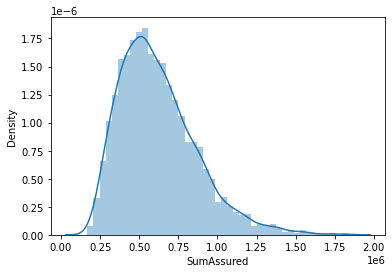

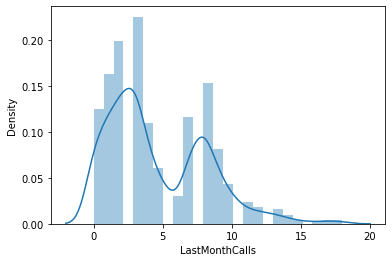

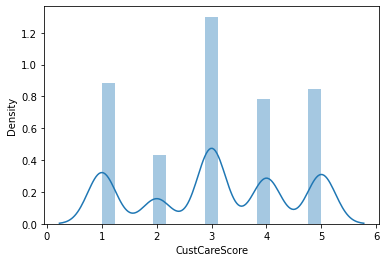

In [13]:
for i,col_val in enumerate(col_names):
    sns.distplot(df[col_val])
    plt.show()

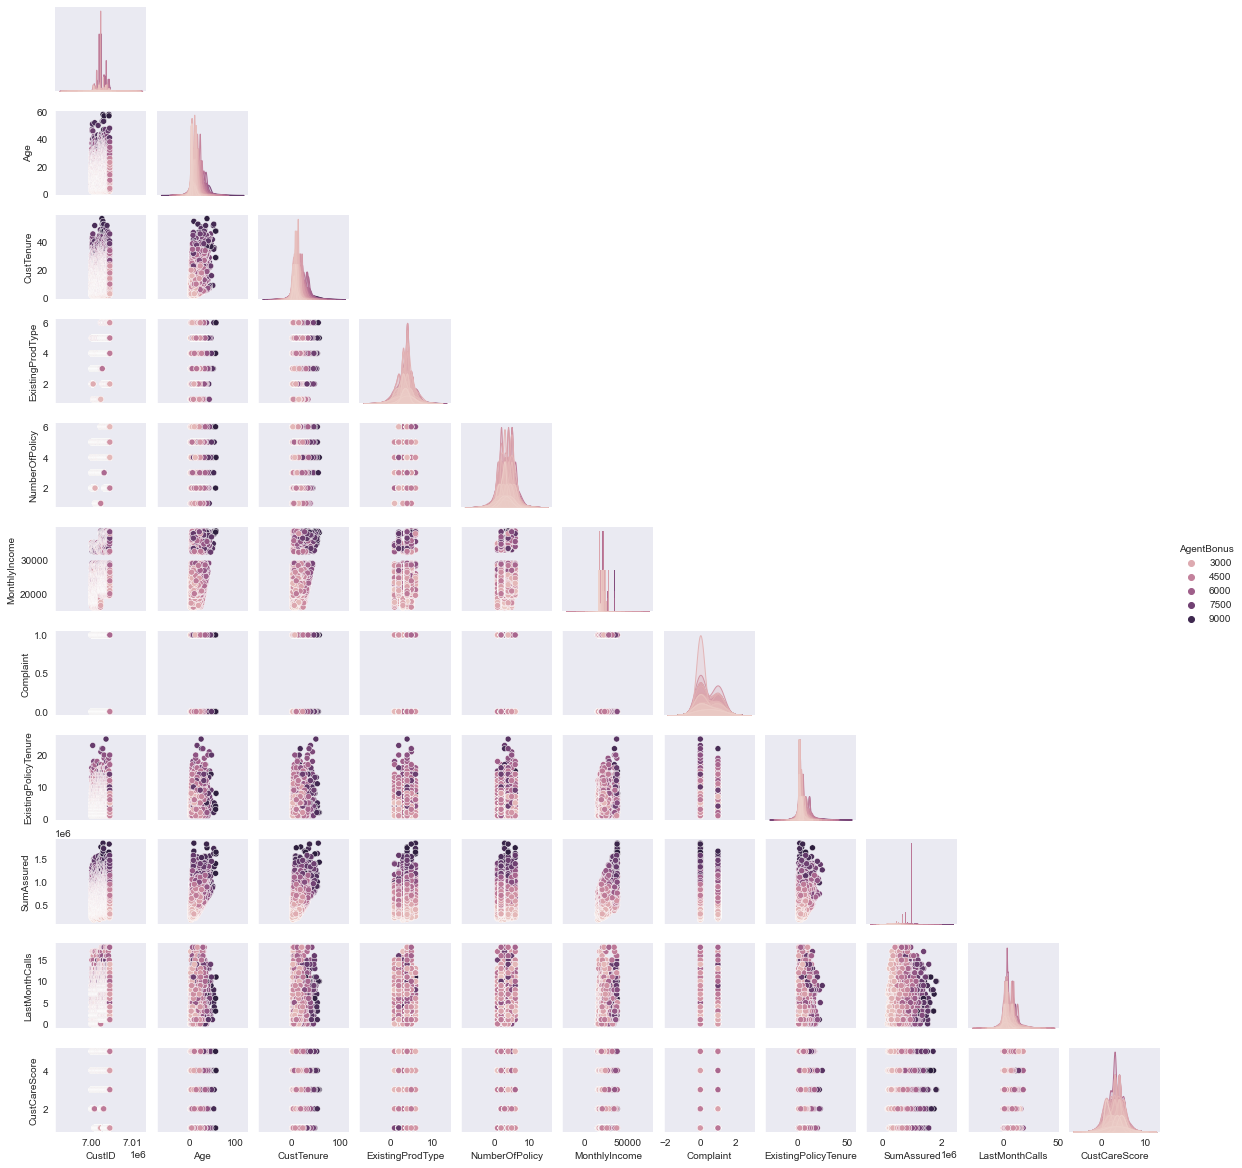

In [14]:
sns.set_style("dark")
sns.pairplot(df,hue="AgentBonus",height=1.5,aspect=1,corner=True)